In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler

# Generate sample data (1000 points per distribution)
np.random.seed(42)
size = 1000

distributions = {
    'normal': np.random.normal(0, 1, size),
    'log_normal': np.random.lognormal(0, 1, size),
    'exponential': np.random.exponential(1, size),
    'poisson': np.random.poisson(3, size),
    'uniform': np.random.uniform(-2, 2, size),
    'heavy_tailed': np.random.standard_t(2, size)
}

df = pd.DataFrame(distributions)


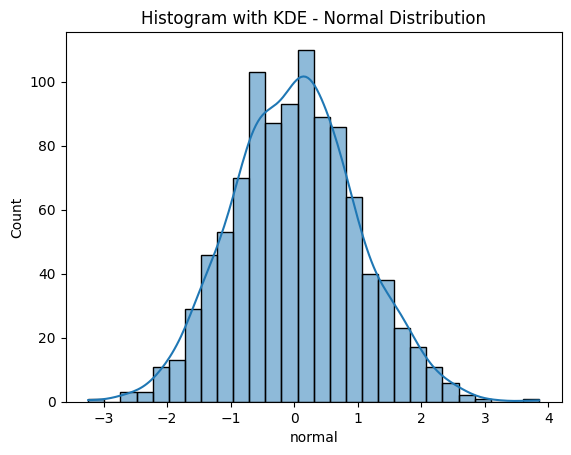

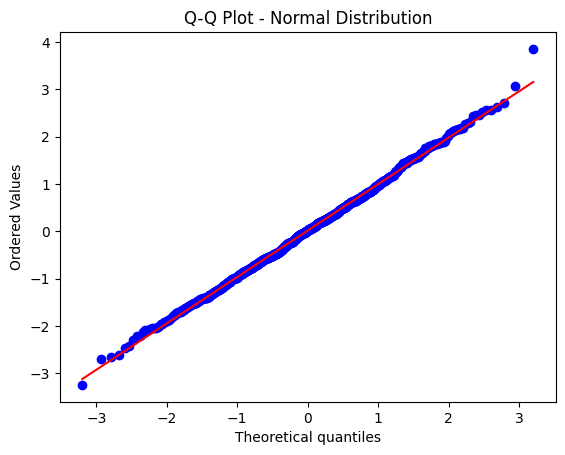

'dist="norm"\ndist specifies the theoretical distribution you want to compare your data to.\n\n"norm" means you are comparing your data to a normal (Gaussian) distribution.\n\nYou can use other distributions as well, such as "expon" for exponential, "lognorm" for log-normal, etc.'

In [2]:

# Histogram with KDE
sns.histplot(df['normal'], kde=True)
plt.title('Histogram with KDE - Normal Distribution')
plt.show()

# Q-Q Plot
stats.probplot(df['normal'], dist="norm", plot=plt)  ## dist = "norm" compares the data with normal distributio 
## we can also compare the data with 
plt.title('Q-Q Plot - Normal Distribution')
plt.show()

'''dist="norm"
dist specifies the theoretical distribution you want to compare your data to.

"norm" means you are comparing your data to a normal (Gaussian) distribution.

You can use other distributions as well, such as "expon" for exponential, "lognorm" for log-normal, etc.'''


Text(0.5, 1.0, 'The Q-Q plot')

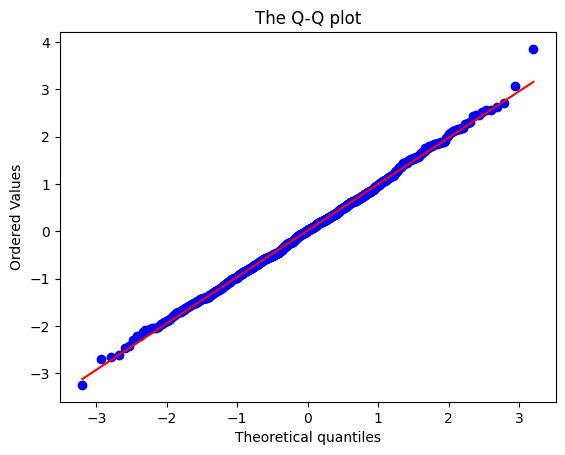

In [3]:
stats.probplot(df['normal'],dist = 'norm',plot=plt)
plt.title("The Q-Q plot")

In [ ]:
from scipy.stats import shapiro
stat,p = shapiro(df['normal'])
result = "Likely Normal" if p > 0.05 else "Not Normal"
print(f"The Shaprio-wilk p-value is {p:.3f}, Result : {result}")
print(f"{stat}")

'''p-value = 0.627
Since this value is greater than 0.05, it means:

    ✅ Your data is likely normally distributed (fail to reject the null hypothesis).
    nd the value 0.9986092190571166?

That looks like a Shapiro-Wilk W-statistic, which:

    Measures how close your data is to a normal distribution.

    A value close to 1 (like yours) means the data is very close to normal.'''

The Shaprio-wilk p-value is 0.627, Result : Likely Normal
0.9986092190571166


## Skewness & Kurtosis

In [6]:
from scipy.stats import skew,kurtosis
skew_val = skew(df['normal'])
kurt_val = skew(df['normal'])
print("skewness  :", skew_val)
print("kurtosis  :", kurt_val)

skewness  : 0.11680083110533511
kurtosis  : 0.11680083110533511


<Axes: xlabel='log_normal', ylabel='Density'>

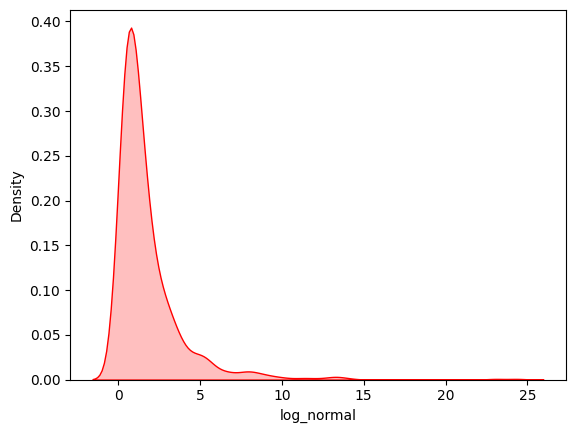

In [9]:
sns.kdeplot(df['log_normal'],color='red',fill='red')

In [10]:
## so we have to change this log_normal distribution into a normal distribution by applying ln(x) = y

df['log_normal_log'] = np.log(df['log_normal'])

<Axes: xlabel='log_normal_log', ylabel='Density'>

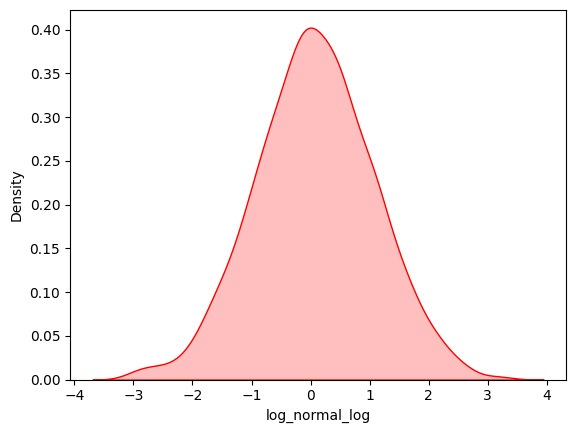

In [ ]:
sns.kdeplot(df['log_normal_log'],color='red',fill='red')   ## now you can see that it get normal distribution 

<Axes: xlabel='exponential', ylabel='Density'>

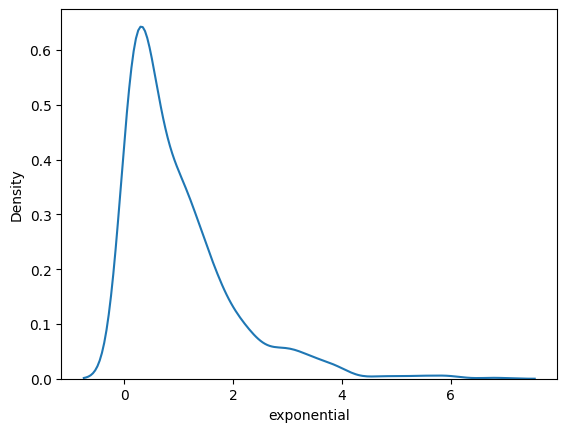

In [18]:
sns.kdeplot(df['exponential'])

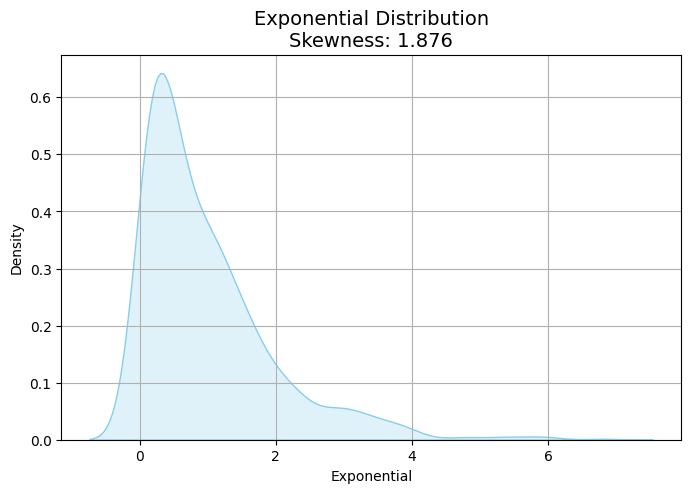

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Calculate skewness
exponential_skew = skew(df['exponential'])

# Plot KDE with skewness shown in the title
plt.figure(figsize=(8, 5))
sns.kdeplot(df['exponential'], fill=True, color='skyblue')
plt.title(f"Exponential Distribution\nSkewness: {exponential_skew:.3f}", fontsize=14)
plt.xlabel("Exponential")
plt.ylabel("Density")
plt.grid(True)
plt.show()




"If any value in df['exponential'] is 0 or negative, log(0) or division by zero will cause an error.\n\nTo fix this, you shift the data:\n\ndf['exponential'] + 1\n\nThis ensures all values > 0, even if the original data had 0s."

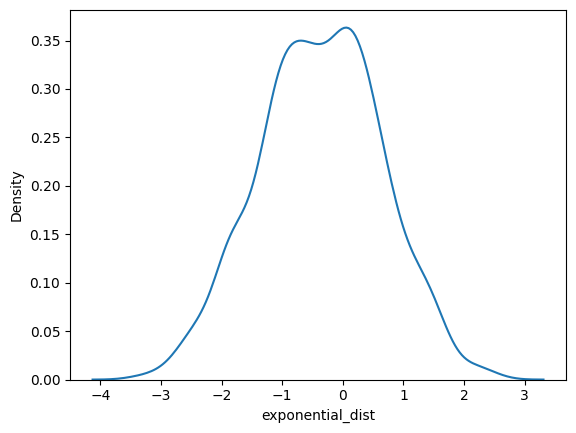

In [20]:
from scipy.stats import boxcox 
df['exponential_dist'],_ = boxcox(df['exponential'])

sns.kdeplot(df['exponential_dist'])

'''x′={λxλ−1​log(x)​if λ=0if λ=0​'''

'''df['test_transformed'] = ((df['test_feature'] + 1)**lam - 1) / lam'''


'''If any value in df['exponential'] is 0 or negative, log(0) or division by zero will cause an error.

To fix this, you shift the data:

df['exponential'] + 1

This ensures all values > 0, even if the original data had 0s.'''


<Axes: xlabel='poisson', ylabel='Density'>

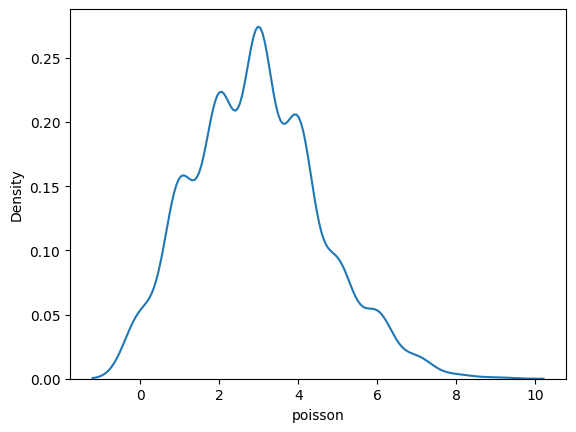

In [22]:
sns.kdeplot(df['poisson'])

<Axes: xlabel='poisson_sqrt', ylabel='Density'>

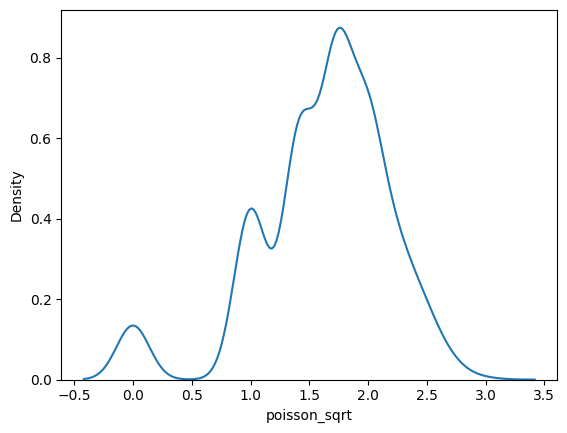

In [24]:
df['poisson_sqrt'] = np.sqrt(df['poisson'])
sns.kdeplot(df['poisson_sqrt'])

0.05422354373656649


<Axes: xlabel='uniform', ylabel='Density'>

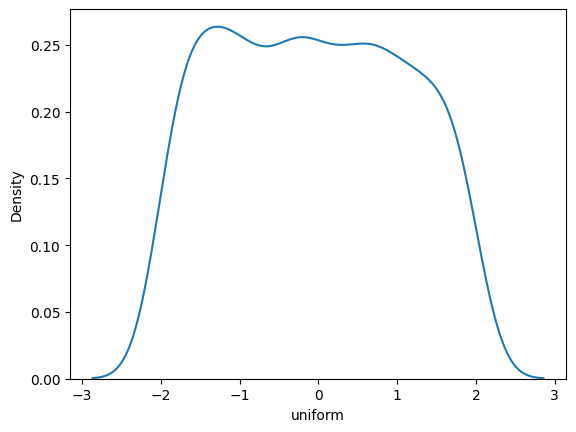

In [28]:
print(skew(df['uniform']))
sns.kdeplot(df['uniform'])

<Axes: xlabel='uniform_scaled', ylabel='Density'>

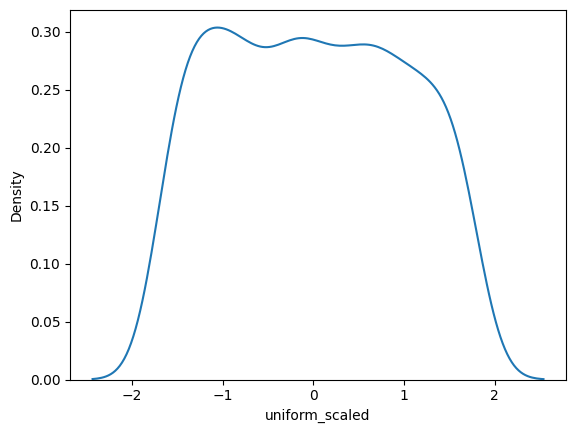

In [30]:
from sklearn.preprocessing import StandardScaler
df['uniform_scaled'] = StandardScaler().fit_transform(df[['uniform']])
sns.kdeplot(df['uniform_scaled'])

15.637061431162099


<Axes: xlabel='heavy_tailed', ylabel='Density'>

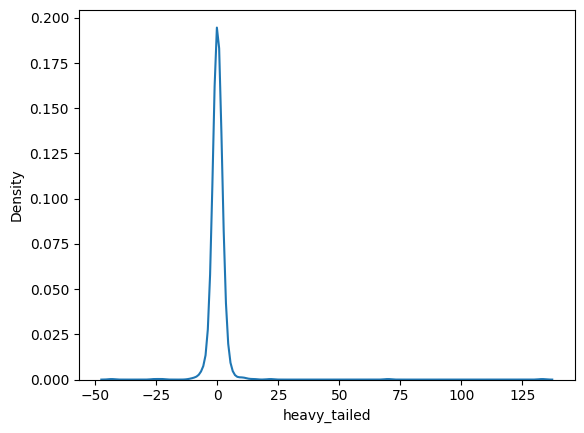

In [35]:
print(skew(df['heavy_tailed']))
sns.kdeplot(df['heavy_tailed'])

<Axes: xlabel='heavy_tailed_robust', ylabel='Density'>

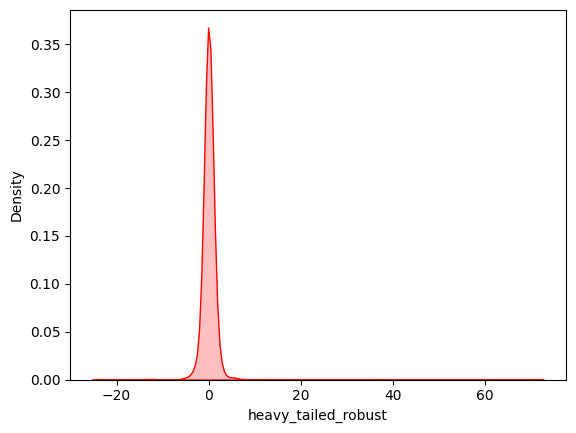

In [38]:
from sklearn.preprocessing import RobustScaler
r = RobustScaler()
df['heavy_tailed_robust'] = r.fit_transform(df[['heavy_tailed']])
sns.kdeplot(df['heavy_tailed_robust'],color='red',fill= 'red')

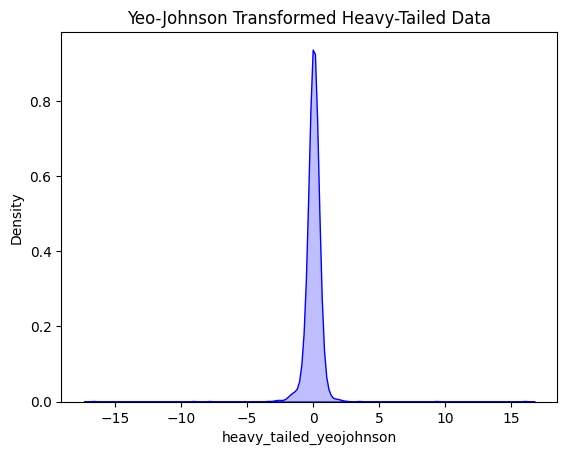

In [39]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['heavy_tailed_yeojohnson'] = pt.fit_transform(df[['heavy_tailed']])
sns.kdeplot(df['heavy_tailed_yeojohnson'], color='blue', fill=True)
plt.title('Yeo-Johnson Transformed Heavy-Tailed Data')
plt.show()


In [43]:
df['heavy_tailed'].isnull().sum()

0

c:\Users\sakth\OneDrive\Desktop\ml_saga\saga\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='heavy_tailed_log', ylabel='Density'>

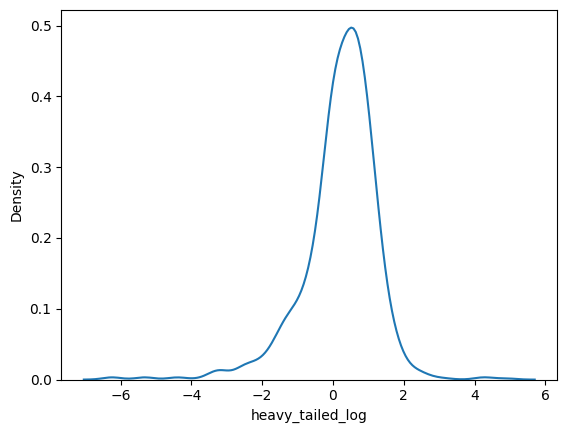

In [55]:
df['heavy_tailed_log'] = np.log1p(df['heavy_tailed'])
df['heavy_tailed_log'] = df['heavy_tailed_log'].fillna(df['heavy_tailed_log'].mode())
sns.kdeplot(df['heavy_tailed_log'])

c:\Users\sakth\OneDrive\Desktop\ml_saga\saga\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='heavy_tailed_log', ylabel='Density'>

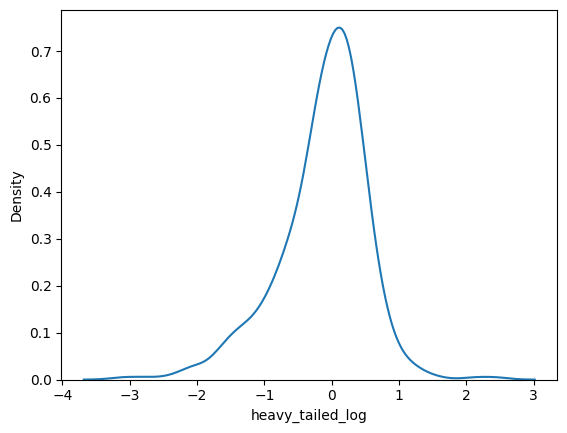

In [73]:
df['heavy_tailed_sqrt'] = np.sqrt(df['heavy_tailed']) 

df['heavy_tailed_log'] = np.log(df['heavy_tailed_sqrt'])
sns.kdeplot(df['heavy_tailed_log'])

In [56]:
df.columns

Index(['normal', 'log_normal', 'exponential', 'poisson', 'uniform',
       'heavy_tailed', 'log_normal_log', 'exponential_dist', 'poisson_sqrt',
       'uniform_scaled', 'heavy_tailed_robust', 'heavy_tailed_yeojohnson',
       'heavy_tailed_log'],
      dtype='object')

In [74]:
lst = ['log_normal_log', 'exponential_dist', 'poisson','uniform_scaled', 'heavy_tailed_robust', 'heavy_tailed_yeojohnson','heavy_tailed_log']
for i in lst:
    skew_val = skew(df[i])
    if abs(skew_val) < 0.5:
        print(i,"  : Approximately Normal")
    elif abs(skew_val) < 1:
        print(i,"  : Mild Skew")
    else:
        print(i,"     : Highly Skewed: Consider log/sqrt/boxcox transformation")

log_normal_log   : Approximately Normal
exponential_dist   : Approximately Normal
poisson   : Approximately Normal
uniform_scaled   : Approximately Normal
heavy_tailed_robust      : Highly Skewed: Consider log/sqrt/boxcox transformation
heavy_tailed_yeojohnson   : Mild Skew
heavy_tailed_log      : Highly Skewed: Consider log/sqrt/boxcox transformation
